• DOMAIN: Automobile

• CONTEXT: The data concerns city-cycle fuel consumption in miles per gallon, to be predicted in terms of 3
multivalued discrete and 5 continuous attributes

• DATA DESCRIPTION: The data concerns city-cycle fuel consumption in miles per gallon

• Attribute Information:
1. mpg: continuous
2. cylinders: multi-valued discrete
3. displacement: continuous
4. horsepower: continuous
5. weight: continuous
6. acceleration: continuous
7. model year: multi-valued discrete
8. origin: multi-valued discrete
9. car name: string (unique for each instance)

• PROJECT OBJECTIVE: Goal is to cluster the data and treat them as individual datasets to train Regression
models to predict ‘mpg’ 

# Question 1 :Import and warehouse data: 

• Import all the given datasets and explore shape and size.

• Merge all datasets onto one and explore final shape and size.

• Export the final dataset and store it on local machine in .csv, .xlsx and .json format for future use.

• Import the data from above steps into python.

In [536]:
import numpy as np 
import pandas as pd
import json
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from scipy.stats import zscore
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder


In [537]:
missing_values = ["n/a", "na", "--", "-"]

In [538]:
carName_df = pd.read_csv("C:\\Users\\srivi\\Downloads\\Carname.csv", na_values = missing_values)
carAttributes_df = pd.read_json("C:\\Users\\srivi\\Downloads\\Car-Attributes.json")
wine_df = pd.read_excel("C:\\Users\\srivi\\Downloads\\Company.xlsx", na_values = missing_values)

In [539]:
print("CAR NAME\n")
print(carName_df.sample(5))
print()
print("CAR ATTRIBUTES\n")
print(carAttributes_df.sample(5))
print()
print("WINE\n")
print(wine_df.sample(5))

CAR NAME

               car_name
343      toyota starlet
201  pontiac ventura sj
268          datsun 510
170       pontiac astro
271    plymouth sapporo

CAR ATTRIBUTES

      mpg  cyl   disp   hp    wt   acc  yr  origin
90   12.0    8  429.0  198  4952  11.5  73       1
312  37.2    4   86.0   65  2019  16.4  80       3
185  26.0    4   98.0   79  2255  17.7  76       1
58   25.0    4   97.5   80  2126  17.0  72       1
57   24.0    4  113.0   95  2278  15.5  72       3

WINE

      A    B    C    D    Quality
39  102    5   59   72  Quality A
2   159  163  135  131        NaN
29   29   49    6   35        NaN
14  186  142  146  174        NaN
52  188  178  175  162        NaN


In [540]:
print("CAR NAME\n")
print(carName_df.dtypes)
print()
print("CAR ATTRIBUTES\n")
print(carAttributes_df.dtypes)
print()
print("WINE\n")
print(wine_df.dtypes)

CAR NAME

car_name    object
dtype: object

CAR ATTRIBUTES

mpg       float64
cyl         int64
disp      float64
hp         object
wt          int64
acc       float64
yr          int64
origin      int64
dtype: object

WINE

A           int64
B           int64
C           int64
D           int64
Quality    object
dtype: object


In [541]:
print("CAR NAME\n")
print(carName_df.shape)
print()
print("CAR ATTRIBUTES\n")
print(carAttributes_df.shape)
print()
print("WINE\n")
print(wine_df.shape)

CAR NAME

(398, 1)

CAR ATTRIBUTES

(398, 8)

WINE

(61, 5)


In [542]:
df = pd.concat([carName_df, carAttributes_df], axis = 1)


In [543]:
df.sample(10)

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
220,datsun f-10 hatchback,33.5,4,85.0,70,1945,16.8,77,3
166,ford mustang ii,13.0,8,302.0,129,3169,12.0,75,1
382,toyota corolla,34.0,4,108.0,70,2245,16.9,82,3
191,plymouth valiant,22.0,6,225.0,100,3233,15.4,76,1
310,toyota corolla tercel,38.1,4,89.0,60,1968,18.8,80,3
371,dodge aries se,29.0,4,135.0,84,2525,16.0,82,1
148,fiat 124 tc,26.0,4,116.0,75,2246,14.0,74,2
85,buick century 350,13.0,8,350.0,175,4100,13.0,73,1
42,dodge monaco (sw),12.0,8,383.0,180,4955,11.5,71,1
51,peugeot 304,30.0,4,79.0,70,2074,19.5,71,2


In [544]:
df.shape

(398, 9)

In [545]:
df.dtypes

car_name     object
mpg         float64
cyl           int64
disp        float64
hp           object
wt            int64
acc         float64
yr            int64
origin        int64
dtype: object

In [546]:
df.to_excel('C:\\Users\\srivi\\Downloads\\car_mpg_combined_xlsx.xlsx')
df.to_csv('C:\\Users\\srivi\\Downloads\\car_mpg_combined_csv.csv')
df.to_json('C:\\Users\\srivi\\Downloads\\car_mpg_combined_json.json')

# Question 2 :Data cleansing: 

• Missing/incorrect value treatment

• Drop attribute/s if required using relevant functional knowledge

• Perform another kind of corrections/treatment on the data.

In [547]:
df.isnull().sum().any()

False

In [548]:
df.isnull().values.any()

False

In [549]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   car_name  398 non-null    object 
 1   mpg       398 non-null    float64
 2   cyl       398 non-null    int64  
 3   disp      398 non-null    float64
 4   hp        398 non-null    object 
 5   wt        398 non-null    int64  
 6   acc       398 non-null    float64
 7   yr        398 non-null    int64  
 8   origin    398 non-null    int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


# Insight:
There are no missing values 

In [550]:
df['hp'].unique()
#df['hp'].str.isdigit().unique()

array([130, 165, 150, 140, 198, 220, 215, 225, 190, 170, 160, 95, 97, 85,
       88, 46, 87, 90, 113, 200, 210, 193, '?', 100, 105, 175, 153, 180,
       110, 72, 86, 70, 76, 65, 69, 60, 80, 54, 208, 155, 112, 92, 145,
       137, 158, 167, 94, 107, 230, 49, 75, 91, 122, 67, 83, 78, 52, 61,
       93, 148, 129, 96, 71, 98, 115, 53, 81, 79, 120, 152, 102, 108, 68,
       58, 149, 89, 63, 48, 66, 139, 103, 125, 133, 138, 135, 142, 77, 62,
       132, 84, 64, 74, 116, 82], dtype=object)

In [551]:
df[df['hp']=='?']

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
32,ford pinto,25.0,4,98.0,?,2046,19.0,71,1
126,ford maverick,21.0,6,200.0,?,2875,17.0,74,1
330,renault lecar deluxe,40.9,4,85.0,?,1835,17.3,80,2
336,ford mustang cobra,23.6,4,140.0,?,2905,14.3,80,1
354,renault 18i,34.5,4,100.0,?,2320,15.8,81,2
374,amc concord dl,23.0,4,151.0,?,3035,20.5,82,1


In [552]:
hp = pd.Series(filter(lambda x : x != '?', df['hp']))
hp_median = hp.median()
print(hp_median)

93.5


In [553]:
#hp.unique()

In [554]:
df[['hp']] = np.where(df['hp']=='?' ,hp_median,df['hp'])

In [555]:
df[df['hp']=='?']

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin


In [556]:
df.iloc[32]

car_name    ford pinto
mpg                 25
cyl                  4
disp                98
hp                93.5
wt                2046
acc                 19
yr                  71
origin               1
Name: 32, dtype: object

In [557]:
print(df['hp'].dtypes)
df['hp'] = df['hp'].astype('int64')
print(df['hp'].dtypes)

object
int64


# Insight:

since hp column is an object but actually has numeric values, needs to be converted to int data type.

Before doing that cheking for any improver values for hp column.

There is a question mark value for column hp. This needs to be imputed.

Imputing the question mark with median value of 93.5 and converting the data type of hp column to int.

In [558]:
#df['car_name'].unique()

In [559]:
df.cyl.unique()

array([8, 4, 6, 3, 5], dtype=int64)

In [560]:
df.origin.unique()

array([1, 3, 2], dtype=int64)

In [561]:
df.yr.unique()

array([70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82], dtype=int64)

# Insight:
    
car_name, yr and origin column may be dropped if needed after data visualisation

Uniques values of origin is not correct as the labels should have equals weights

# Question 3:Data analysis & visualisation: 
        
• Perform detailed statistical analysis on the data.

• Perform a detailed univariate, bivariate and multivariate analysis with appropriate detailed comments after each
analysis.

Hint: Use your best analytical approach. Even you can mix match columns to create new columns which can be used for better analysis. Create
your own features if required. Be highly experimental and analytical here to find hidden patterns.

In [562]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cyl,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
disp,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
hp,398.0,104.296482,38.224809,46.0,76.000,93.0,125.000,230.0
wt,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acc,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
yr,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
origin,398.0,1.572864,0.802055,1.0,1.000,1.0,2.000,3.0


# Insight:
    
There are no single value columns to be removed from dataset

There are no negative values

By comparing mean and 50 percent values disp and weight seems skewed quiet larger compared to other variables

Outliers will be interpreted from box plot 

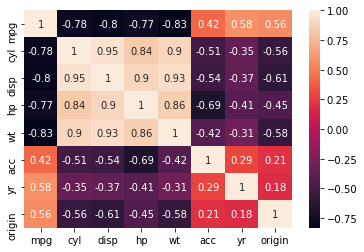

In [563]:
sns.heatmap(df.corr(),annot=True)

# Insight:
    
All the columns show high correlation with each other except yr column which dosent show much correlation with any columns

orgin and acceleration also shows very low correlation

overall the correlation between variables looks good

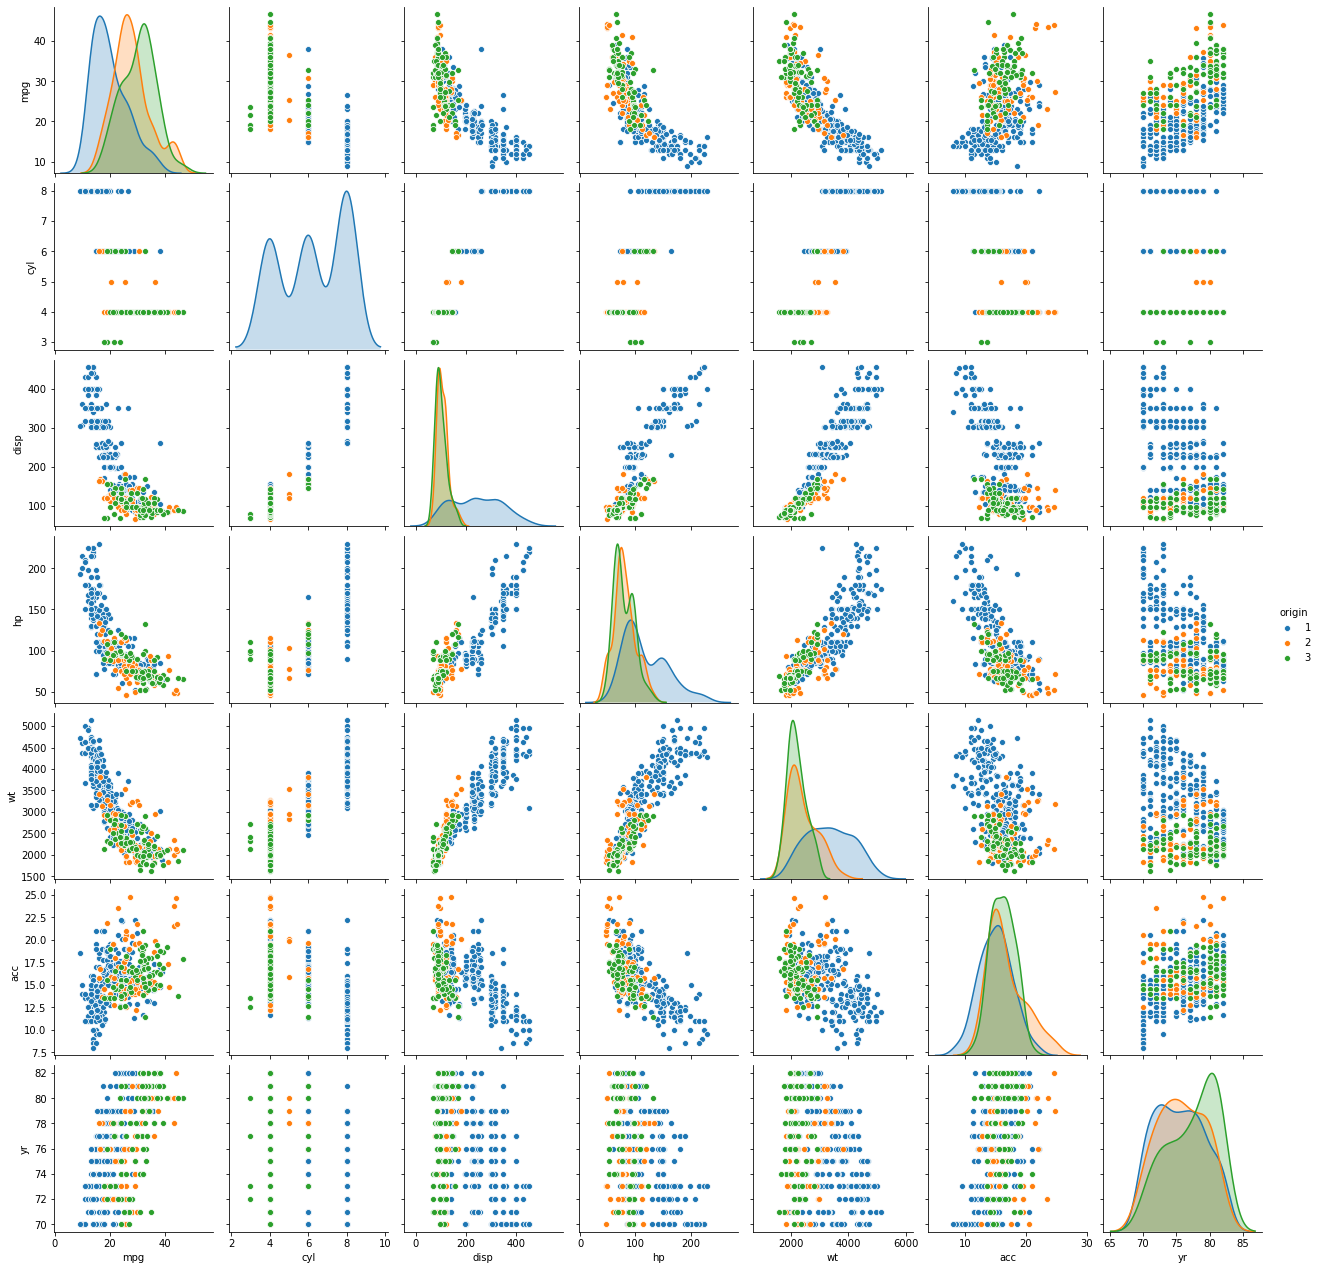

In [564]:
sns.pairplot(data=df,diag_kind='kde',hue="origin")

# Insight:
    
disp, hp and wt shows a curvilinear correlation with mpg can be seen from above pair plot

all the kde plots, depite the hue (origin), shows some hidden clusters. For instance in displacement the blue origin plot shows 3 clusters. Similarly orange plot of wt, green and blue plot of hp.

These may be due to missing values or naturally occuring clusters that needs to be interpreted after finding the optimal clusters by cluster analysis

In [565]:
import plotly.express as px
plotdf = df.drop(labels=['car_name'],axis=1)
fig = px.box(plotdf)
fig.update_layout(
    autosize=False,
    width=800,
    height=500)
fig.show()

# Insight:
    
hp and acc has outliers, mpg is to be predicted 

outliers need to be handled as kmeans algorithm is affected by outliers. Agglomerative is not as it will seperate out the outliers.

scale of weight is very large than other columns. Variables need be be scaled as clustering uses distance metric and kmeans is a parametric approach.

In [566]:
#sns.countplot(x="car_name", data=df, ax=ax)
px.histogram(df, x="car_name", color="origin")


# Insight:
most of the cars are from origin 1

In [567]:
px.histogram(df, x="disp", width=500, height=300)


# Insight:
displacement is low for many cars

In [568]:
px.histogram(df, x="cyl",width=500, height=300)


# Insight:
There are larger numbee of 4 cylinder cars

In [569]:
px.box(plotdf, x='cyl', y='disp', width=800, height=500)


# Insight:
With increase in cylinder increases displacement. There is an outlier of displacement, has 8 cylinders with displacement 455.

All cars under 6 cylinders has low displacement.

In [570]:
px.parallel_coordinates(df, color="origin", color_continuous_scale=[(0.00, "red"),   (0.33, "red"),
                                                     (0.33, "green"), (0.66, "green"),
                                                     (0.66, "blue"),  (1.00, "blue")])

# Insight:
Most of the origin 3 and 2 cars have low cylinder, displacement, hp and weight. Should be small cars.

Most of tha origin 1 cars have high disp, cylinder, hp and weight. Should be large cars. 

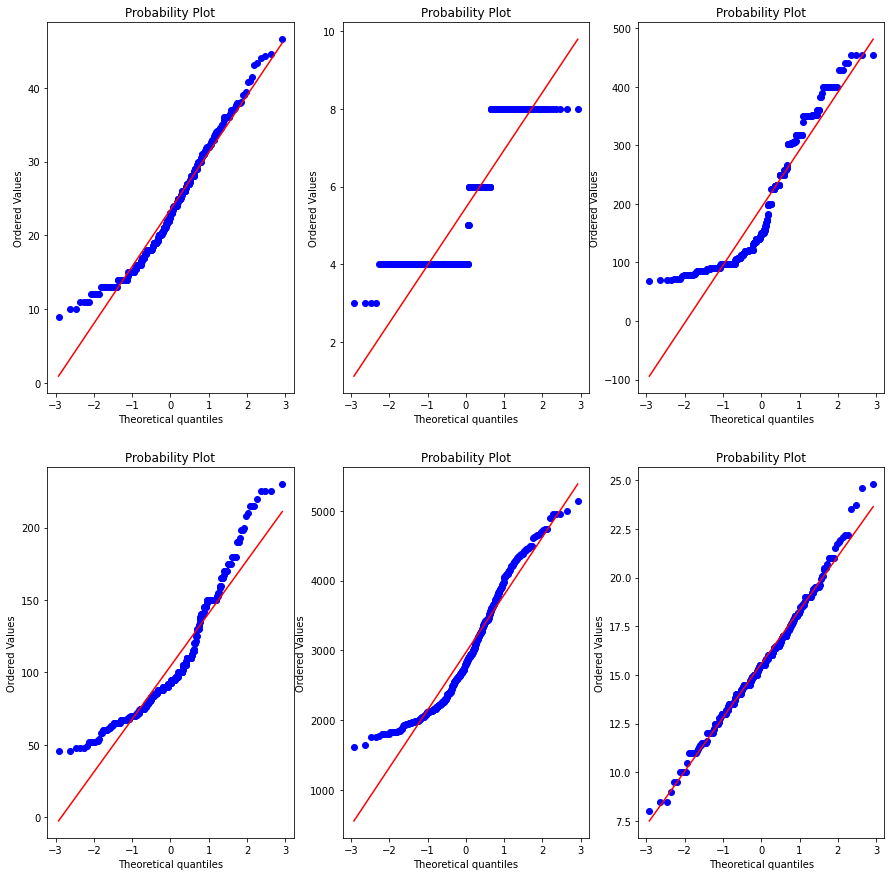

In [571]:
f, axes = plt.subplots(2, 3, figsize=(15,15))

stats.probplot(df['mpg'], dist="norm", plot=axes[0,0])
stats.probplot(df['cyl'], dist="norm", plot=axes[0,1])
stats.probplot(df['disp'], dist="norm", plot=axes[0,2])
stats.probplot(df['hp'], dist="norm", plot=axes[1,0])
stats.probplot(df['wt'], dist="norm", plot=axes[1,1])
stats.probplot(df['acc'], dist="norm", plot=axes[1,2])
plt.show()


# Insight:

Checking for normality as kmeans is parametric and gives only spherical distribution

Most of the variables looks normal like except cylinder which is a discrete variable.

# Question 4:Machine learning: 
        
• Use K Means and Hierarchical clustering to find out the optimal number of clusters in the data.

• Share your insights about the difference in using these two methods. 

In [572]:
X_clus_train = df.drop(labels=['car_name','yr','origin'], axis=1)
print(X_clus_train.shape)

(398, 6)


In [573]:
def out(col):
    q25, q75 = np.percentile(col, 25), np.percentile(col, 75)
    iqr = q75 - q25
    
    # calculate the outlier cutoff
    cut_off = iqr * 1.5
    upper = q75 + cut_off
    lower = q25 - cut_off
    return upper,lower

for x in X_clus_train.columns:
    up,low = out(X_clus_train[x])
    X_clus_train[x]=np.where(X_clus_train[x]>up ,up,X_clus_train[x])
    X_clus_train[x]=np.where(X_clus_train[x]<low ,low,X_clus_train[x])
    
fig = px.box(X_clus_train)
fig.update_layout(
    autosize=False,
    width=800,
    height=500)
fig.show()

# Insight:
Since clustering involves distance metric, removed the upper and lower outliers

In [574]:
sc_X_clus_train = X_clus_train.apply(zscore)

In [575]:
cluster_errors = []
for k in range(2,20):
  c = KMeans(n_clusters=k,random_state=10)
  c.fit(sc_X_clus_train)
  labels = c.labels_
  centroids = c.cluster_centers_
  cluster_errors.append( c.inertia_ )
clusters_df = pd.DataFrame( { "k_clusters":range(2,20), "cluster_errors": cluster_errors } )
clusters_df[0:15]

,k_clusters,cluster_errors
0,2,934.044575
1,3,597.142913
2,4,480.136819
3,5,412.133469
4,6,360.134491
5,7,324.917606
6,8,293.199133
7,9,276.264844
8,10,261.438908
9,11,244.404972


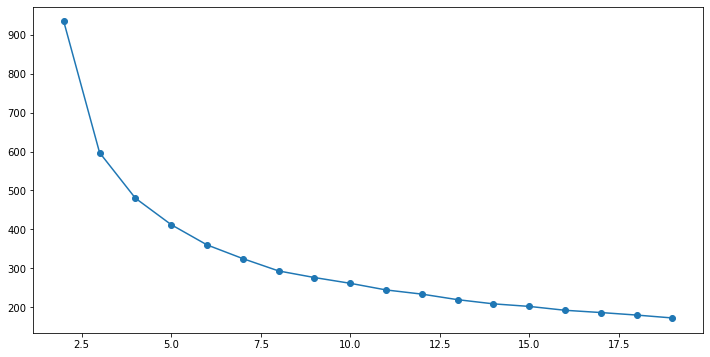

In [576]:
# Elbow plot

plt.figure(figsize=(12,6))
plt.plot( clusters_df.k_clusters, clusters_df.cluster_errors, marker = "o" )

For n_clusters = 2 The average silhouette_score is : 0.5477200539505451


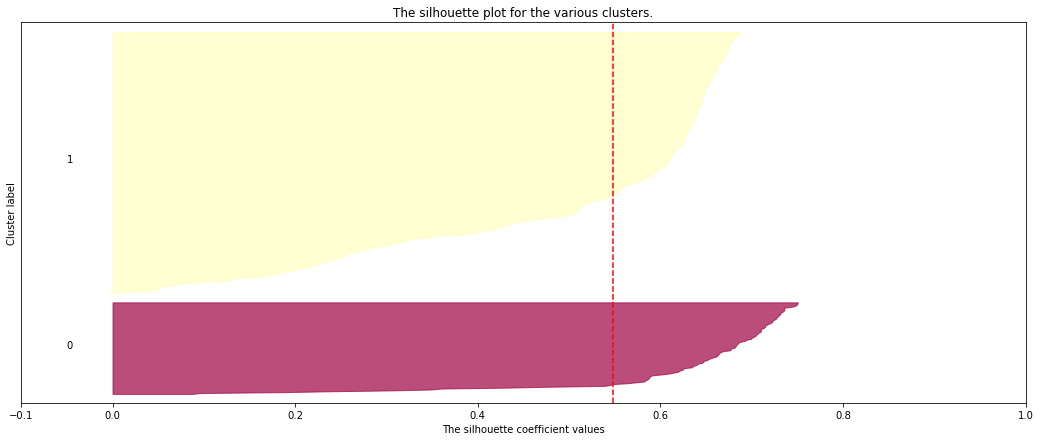

For n_clusters = 3 The average silhouette_score is : 0.4430300171567692


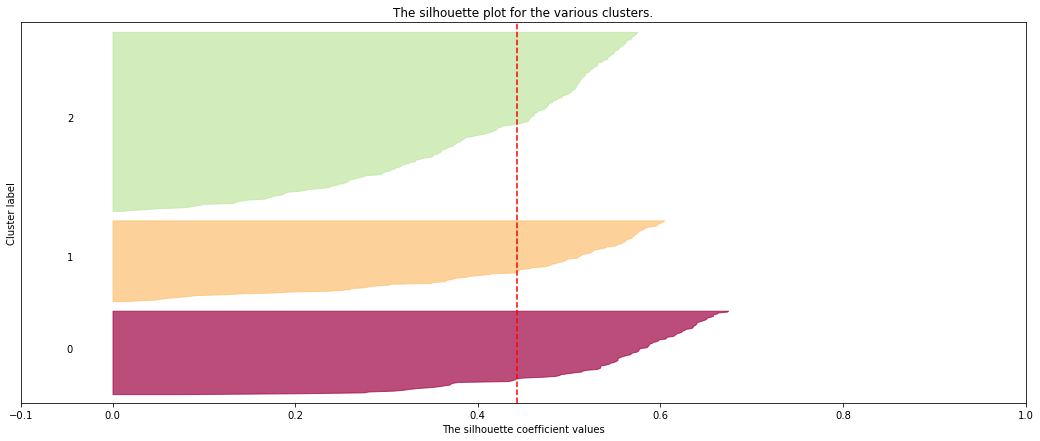

For n_clusters = 4 The average silhouette_score is : 0.3836261491411107


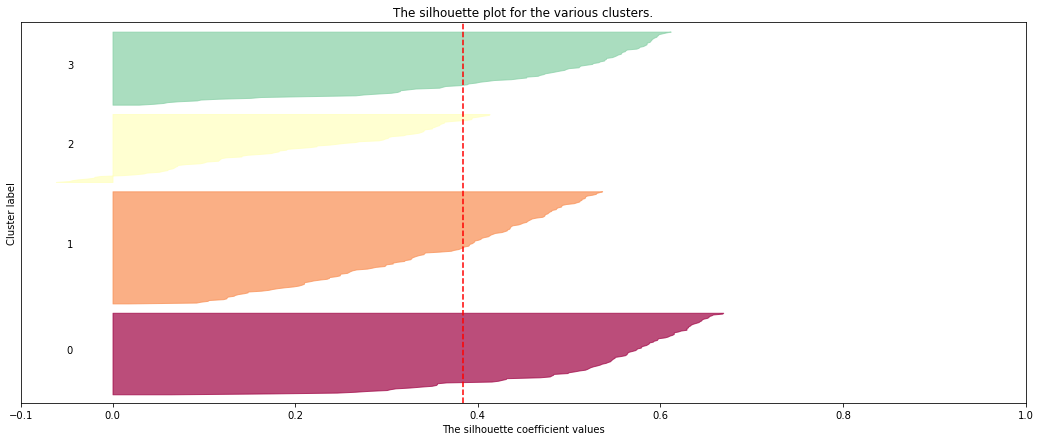

In [577]:
for n_clusters in range(2,5):
    # Create a subplot with 1 row and 2 columns
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(sc_X_clus_train) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(sc_X_clus_train)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(sc_X_clus_train, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(sc_X_clus_train, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        cmap = cm.get_cmap("Spectral")

        color = cmap(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.show()

# Insight:
From the elbow plot we can see than after k=3 there is no much difference in within cluster variance

From silhoute score plot we can see that the silhoute score decreaces eventually. 1 being the best silhote value, k=2 gives first best score but we have 2 imbalance cluster.

All clusters should be more or less of same size

so we can say k=3 gives the optimal cluster  from kmeans clustering

In [578]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage

In [579]:
from scipy.spatial.distance import pdist  

In [580]:
Z = linkage(sc_X_clus_train, 'single')
c, coph_dists = cophenet(Z , pdist(sc_X_clus_train))

print("Single linkage ", c)

Single linkage  0.7836168962714052


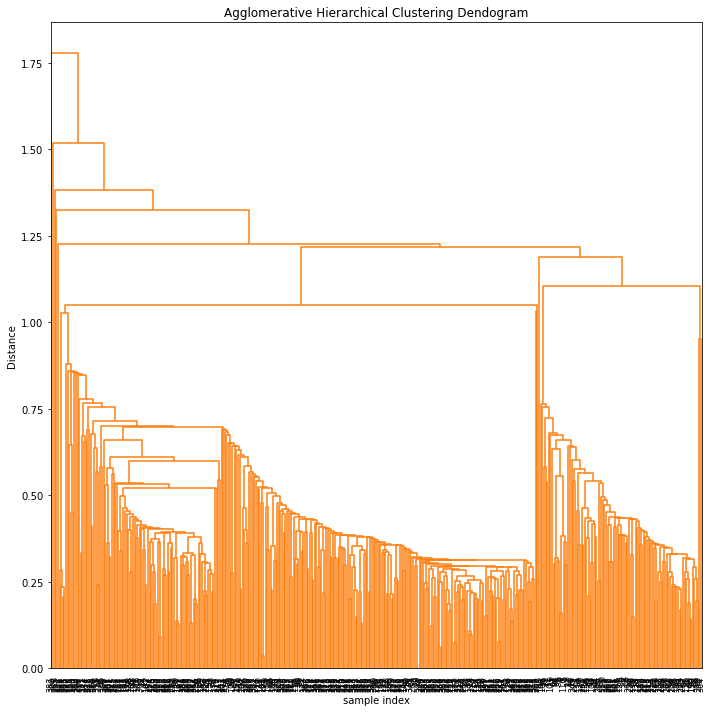

In [581]:
plt.figure(figsize=(10, 10))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 30, leaf_font_size=8. )
plt.tight_layout()

Complete linkage  0.8070538237540646


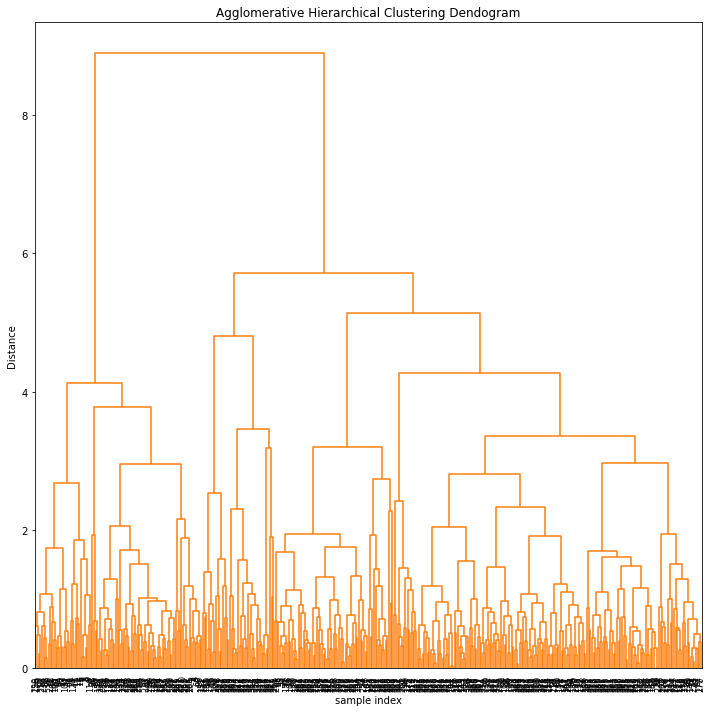

In [582]:
Z = linkage(sc_X_clus_train, 'complete')
c, coph_dists = cophenet(Z , pdist(sc_X_clus_train))

print("Complete linkage ", c)

plt.figure(figsize=(10, 10))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 30, leaf_font_size=8. )
plt.tight_layout()

Complete linkage  0.8210953962654699


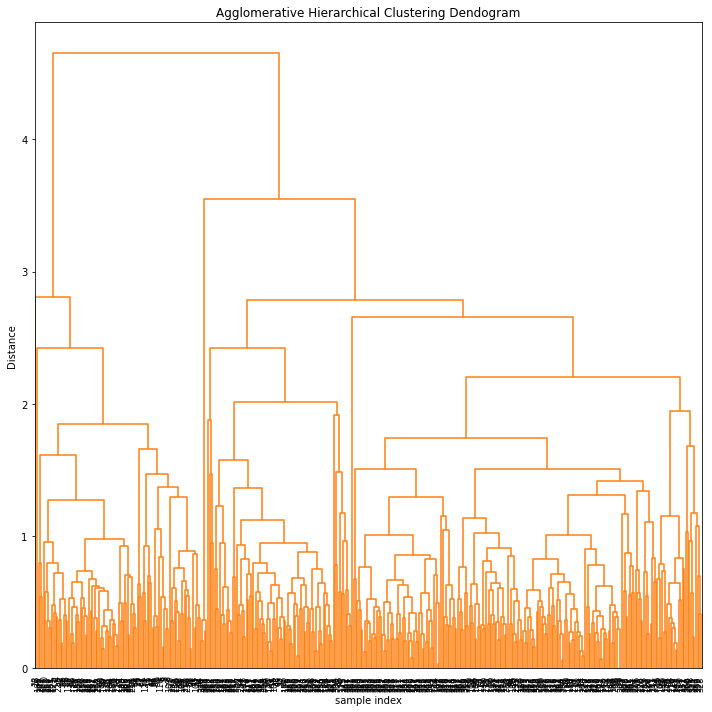

In [583]:
Z = linkage(sc_X_clus_train, 'average')
c, coph_dists = cophenet(Z , pdist(sc_X_clus_train))

print("Complete linkage ", c)
plt.figure(figsize=(10, 10))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 30, leaf_font_size=8. )
plt.tight_layout()

Complete linkage  0.8212226285227967


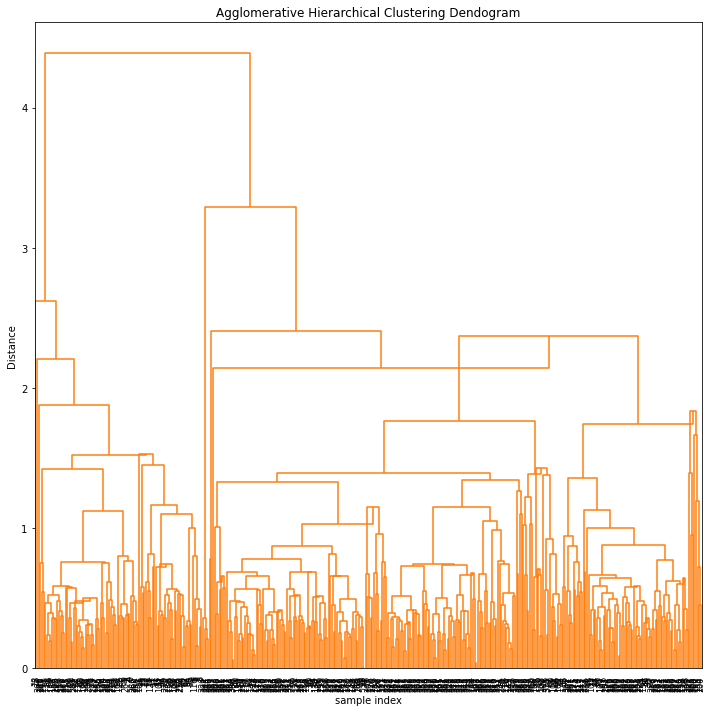

In [584]:
Z = linkage(sc_X_clus_train, 'centroid')
c, coph_dists = cophenet(Z , pdist(sc_X_clus_train))

print("Complete linkage ", c)
plt.figure(figsize=(10, 10))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 30, leaf_font_size=8. )
plt.tight_layout()

Complete linkage  0.8081432868697195


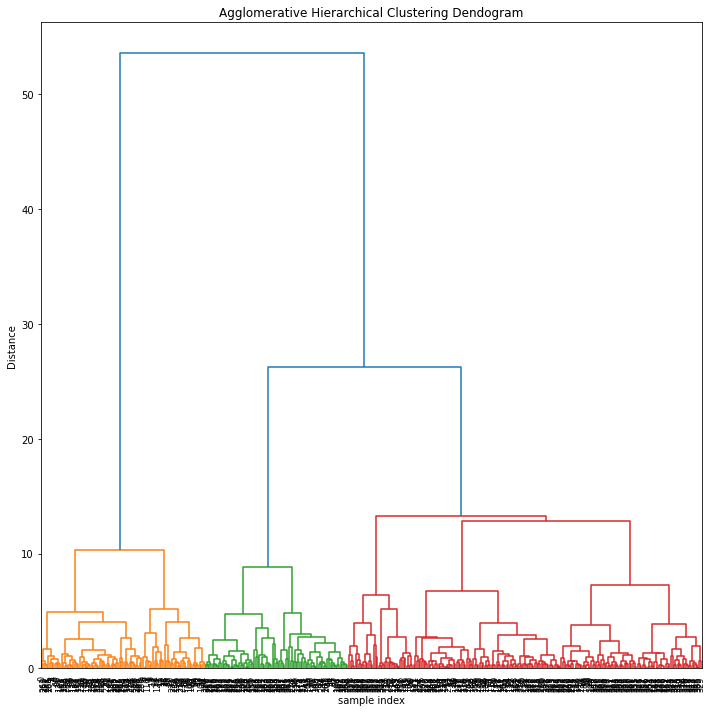

In [585]:
Z = linkage(sc_X_clus_train, 'ward')
c, coph_dists = cophenet(Z , pdist(sc_X_clus_train))

print("Complete linkage ", c)
plt.figure(figsize=(10, 10))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 25, leaf_font_size=8. )
plt.tight_layout()

# Insight:

From all the linkage methods used we can see than ward method gives the clusters at large dendrogramic distance

Kmeans is sensitive to different starting position and finding optimal k is expensive. But agglomerative clustering starts withh all points and converge at super cluster. So comparing both kmeans and agglomerative we can fix the optimal k.

# Question 5:Answer below questions based on outcomes of using ML based methods

• Mention how many optimal clusters are present in the data and what could be the possible reason behind it.

• Use linear regression model on different clusters separately and print the coefficients of the models individually

• How using different models for different clusters will be helpful in this case and how it will be different than using
one single model without clustering? Mention how it impacts performance and prediction.


In [586]:
c = KMeans(n_clusters=3,random_state=10)

prediction=c.fit_predict(sc_X_clus_train)
sc_X_clus_train['cluster'] = prediction 
df['cluster'] = prediction

In [587]:
df.sample(10)

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin,cluster
274,audi 5000,20.3,5,131.0,103,2830,15.9,78,2,1
229,pontiac grand prix lj,16.0,8,400.0,180,4220,11.1,77,1,0
327,audi 5000s (diesel),36.4,5,121.0,67,2950,19.9,80,2,2
147,fiat 128,24.0,4,90.0,75,2108,15.5,74,2,2
13,buick estate wagon (sw),14.0,8,455.0,225,3086,10.0,70,1,0
285,chevrolet caprice classic,17.0,8,305.0,130,3840,15.4,79,1,0
143,opel manta,26.0,4,97.0,78,2300,14.5,74,2,2
287,mercury grand marquis,16.5,8,351.0,138,3955,13.2,79,1,0
101,plymouth duster,23.0,6,198.0,95,2904,16.0,73,1,1
328,mercedes-benz 240d,30.0,4,146.0,67,3250,21.8,80,2,2


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000183D7671310>,
      dtype=object)

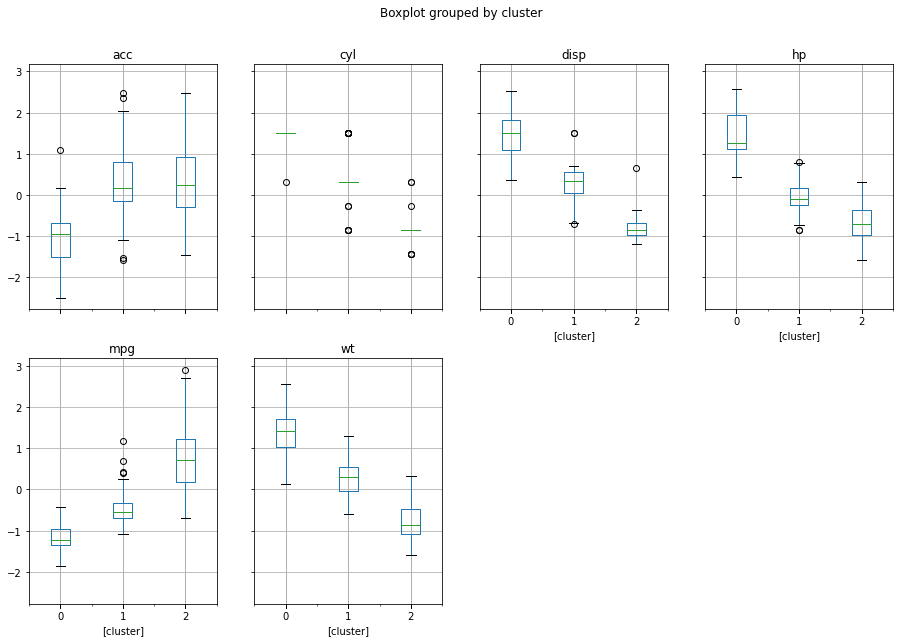

In [588]:
sc_X_clus_train.boxplot(by = 'cluster',  layout=(2,4), figsize=(15, 10))

# Insight:

From sillhoute score plot and dentrogram, there are three optimal clusters in the data. 

Except acceleration the body of the box plot for cyl, disp, hp, mpg and weight dosent overlap with each other

Mpg, acc are low, hp , wt, disp, cyl are high. These type of cars are SUV's

mpg, hp, wt, disp, cyl, acc are medium. These cars can be sedan/saloon cars

mpg, acc are high, hp, wt, disp, cyl are low. These types of cars are small/hatchback cars.

In [589]:
df_s = df[df['cluster']==2]
df_m = df[df['cluster']==1]
df_l = df[df['cluster']==0]

In [590]:
df_l['origin'].unique()

array([1], dtype=int64)

In [591]:
df_s.shape

(207, 10)

In [592]:
df_m.shape

(94, 10)

In [593]:
df_l.shape

(97, 10)

In [594]:
df1 = pd.get_dummies(df, columns=['origin'])
df_s = pd.get_dummies(df_s, columns=['origin'])
df_m = pd.get_dummies(df_m, columns=['origin'])
#df_l = pd.get_dummies(df_l, columns=['origin'])

In [595]:
df1.sample(2)

,car_name,mpg,cyl,disp,hp,wt,acc,yr,cluster,origin_1,origin_2,origin_3
377,mazda glc custom,31.0,4,91.0,68,1970,17.6,82,2,0,0,1
394,vw pickup,44.0,4,97.0,52,2130,24.6,82,2,0,1,0


In [596]:
df_s.sample(2)


,car_name,mpg,cyl,disp,hp,wt,acc,yr,cluster,origin_1,origin_2,origin_3
175,volkswagen rabbit,29.0,4,90.0,70,1937,14.0,75,2,0,1,0
375,volkswagen rabbit l,36.0,4,105.0,74,1980,15.3,82,2,0,1,0


In [597]:
df_m.sample(2)


,car_name,mpg,cyl,disp,hp,wt,acc,yr,cluster,origin_1,origin_2,origin_3
228,ford granada,18.5,6,250.0,98,3525,19.0,77,1,1,0,0
306,chevrolet citation,28.8,6,173.0,115,2595,11.3,79,1,1,0,0


In [598]:
df_l.sample(2)

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin,cluster
44,pontiac safari (sw),13.0,8,400.0,175,5140,12.0,71,1,0
12,chevrolet monte carlo,15.0,8,400.0,150,3761,9.5,70,1,0


In [599]:
df_l['origin'].unique()

array([1], dtype=int64)

In [600]:
X = df_s.drop(['mpg','car_name','yr','cluster'], axis=1)
y = df_s[['mpg']]

Xs = df_s.drop(['mpg','car_name','yr','cluster'], axis=1)
ys = df_s[['mpg']]

Xm = df_m.drop(['mpg','car_name','yr','cluster'], axis=1)
ym = df_m[['mpg']]

Xl = df_l.drop(['mpg','car_name','yr','cluster','origin'], axis=1)
yl = df_l[['mpg']]

In [601]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=10)
Xs_train, Xs_test, ys_train, ys_test = train_test_split(Xs, ys, test_size=0.35, random_state=10)
Xm_train, Xm_test, ym_train, ym_test = train_test_split(Xm, ym, test_size=0.35, random_state=10)
Xl_train, Xl_test, yl_train, yl_test = train_test_split(Xl, yl, test_size=0.35, random_state=10)

In [602]:
sc = StandardScaler()
sc_X_train = sc.fit_transform(X_train)
sc_X_test = sc.transform(X_test)

scs = StandardScaler()
sc_Xs_train = scs.fit_transform(Xs_train)
sc_Xs_test = scs.transform(Xs_test)

scm = StandardScaler()
sc_Xm_train = scm.fit_transform(Xm_train)
sc_Xm_test = scm.transform(Xm_test)

scl = StandardScaler()
sc_Xl_train = scl.fit_transform(Xl_train)
sc_Xl_test = scl.transform(Xl_test)

In [603]:
reg = LinearRegression()
reg.fit(sc_X_train, y_train)
for i, col in enumerate((X_train.columns)):
    print("The coefficient for {} is {}".format(col, reg.coef_[0][i]))
print(reg.score(sc_X_train, y_train))
print(reg.score(sc_X_test, y_test)) 

regs = LinearRegression()
regs.fit(sc_Xs_train, ys_train)
for i, col in enumerate((Xs_train.columns)):
    print("The coefficient for {} is {}".format(col, regs.coef_[0][i]))
print(regs.score(sc_Xs_train, ys_train))
print(regs.score(sc_Xs_test, ys_test))   

regm = LinearRegression()
regm.fit(sc_Xm_train, ym_train)
for i, col in enumerate((Xm_train.columns)):
    print("The coefficient for {} is {}".format(col, regm.coef_[0][i]))
print(regm.score(sc_Xm_train, ym_train))
print(regm.score(sc_Xm_test, ym_test))

regl = LinearRegression()
regl.fit(sc_Xl_train, yl_train)
for i, col in enumerate((Xl_train.columns)):
    print("The coefficient for {} is {}".format(col, regl.coef_[0][i]))
print(regl.score(sc_Xl_train, yl_train))
print(regl.score(sc_Xl_test, yl_test))


The coefficient for cyl is 1.4005079015780255
The coefficient for disp is -0.38984393152302027
The coefficient for hp is -2.133203169932114
The coefficient for wt is -0.9223065303626313
The coefficient for acc is -0.5334931573946071
The coefficient for origin_1 is -0.1995255002498003
The coefficient for origin_2 is -0.3268932168483455
The coefficient for origin_3 is 0.5141908124464135
0.3665792910880378
0.4495274067399847
The coefficient for cyl is 1.4005079015780255
The coefficient for disp is -0.38984393152302027
The coefficient for hp is -2.133203169932114
The coefficient for wt is -0.9223065303626313
The coefficient for acc is -0.5334931573946071
The coefficient for origin_1 is -0.1995255002498003
The coefficient for origin_2 is -0.3268932168483455
The coefficient for origin_3 is 0.5141908124464135
0.3665792910880378
0.4495274067399847
The coefficient for cyl is 1.5394526050075377
The coefficient for disp is -0.8534410092665882
The coefficient for hp is 0.10436679107402044
The coef

# Insight:

After splitting the dataframe based on three clusters, dropped year as it dosent make any sense to define the cars properties,
dropped cluster as it is a single value column, dropped carnames as it categorical and dosent make sense to define car properties.

Instead of fitting the linear regression and predicting the mpg as a whole, splitting the data set based on the type of cars gives much better results.

The above accuracy dosent show much great value that is because of there are only fewer records in data set.

If we look at the boxplot after clustering we can clearly see the mpg is high for small cars, lower for large cars and high/medium for medium cars. So splitting the dataframe cluster wise and best fitting the regression line will reduce the errors
and gives better prediction of mpg

# Question 6:Improvisation 
    
• Detailed suggestions or improvements or on quality, quantity, variety, velocity, veracity etc. on the data points
collected by the company to perform a better data analysis in future.

# Insight:

The data set has more examples of origin 1 than 2 and 3. Can be equalised.

The year of cars are between 70 and 82 which means there are no new data of cars that are recenly manufactured. this might not perform well on the production for recent cars as these data are old.

The data set has very few examples, might be benificial to increase the performance if more data are added.

# PROJECT OBJECTIVE: Goal is to build a synthetic data generation model which can impute values wherever empty the company has missed recording the data.

1. Design a synthetic data generation model which can impute values [Attribute: Quality] wherever empty the company
has missed recording the data.

2. Detailed suggestions or improvements or on collected data and synthetic data’s quality, quantity, variety, velocity,
veracity etc. in order to perform a better data analysis in future.

In [604]:
wine_df.sample(10)

,A,B,C,D,Quality
30,135,163,194,168,Quality B
3,61,23,3,44,Quality A
58,88,39,9,102,NaN
8,160,181,194,178,Quality B
55,103,60,15,56,Quality A
41,73,22,83,31,Quality A
48,197,161,182,198,Quality B
25,103,74,59,17,Quality A
52,188,178,175,162,NaN
54,70,96,70,103,Quality A


In [605]:
wine_df['Quality'].unique()

array(['Quality A', 'Quality B', nan], dtype=object)

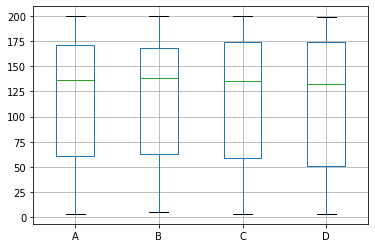

In [606]:
wine_df.boxplot()

In [607]:
#Didnt scale data as all the columns are on same scale

def replaceTarget(df,target,arr):
    j=0
    for i in range(0,len(arr)):
        if not (pd.isnull(arr[i])):
            print(arr[i])
            df[target].replace(to_replace=arr[i],value=j,inplace=True)
            j=j+1
        

def knnImputaion(df,target):
    if df[target].isnull().sum():
        print("yes missing")
        if df[target].dtype == object:
            replaceTarget(wine_df,target,wine_df['Quality'].unique())
            wine_df['Quality'].unique()
            m = KNNImputer(n_neighbors=3, weights="uniform") 
            m.fit(df)
            wine_new = m.transform(df)
    return wine_new
        

In [608]:
wine_new = pd.DataFrame(knnImputaion(wine_df,'Quality'),columns=wine_df.columns.values)

yes missing
Quality A
Quality B


In [609]:
#from sklearn.impute import KNNImputer
wine_new['Quality'].unique() 

array([0., 1.])

In [610]:
wine_df

,A,B,C,D,Quality
0,47,27,45,108,0.0
1,174,133,134,166,1.0
2,159,163,135,131,NaN
3,61,23,3,44,0.0
4,59,60,9,68,0.0
...,...,...,...,...,...
56,200,186,185,179,1.0
57,137,182,165,199,NaN
58,88,39,9,102,NaN
59,180,157,192,198,NaN


In [611]:
wine_new

,A,B,C,D,Quality
0,47.0,27.0,45.0,108.0,0.0
1,174.0,133.0,134.0,166.0,1.0
2,159.0,163.0,135.0,131.0,1.0
3,61.0,23.0,3.0,44.0,0.0
4,59.0,60.0,9.0,68.0,0.0
...,...,...,...,...,...
56,200.0,186.0,185.0,179.0,1.0
57,137.0,182.0,165.0,199.0,1.0
58,88.0,39.0,9.0,102.0,0.0
59,180.0,157.0,192.0,198.0,1.0


In [612]:
wine_new.to_csv('C:\\Users\\srivi\\Downloads\\wine_imputed.csv')

# Insight:

No of records in data set is very low. Can include more examples of data to improve model performance.

There is no clarity of column names. Hard to study the domain i.e. which chemical compostion is contributing to define quality etc. Interpretation will be difficult. So defining each column will be helpful.

Missing values in target column is not quiet appreciated while building the model. If there are more missing values in target column, for supervised learning it might affect the model performance so missing values in target column can be avoided.

